
# Purpose
The purpose of this exercise is to explore data provided by Yelp, the reviewing engine.  The businesses dataset used here contains information about businesses reviewed on yelp.
I employ a number of machine learning and statistical prediction methods in order to identify attributes of a restaurant that can help predict it's rating.  This exercise
is NOT intended to correctly predict a restaurants rating given its attributes, but instead, glean actionable insights for prospective/current restauranteurs.

#### To Do:

Look to reduce dimensionality of dataset
<br>
Run subsets of data 
<br>
False vs. NA
<br>
Run simulations of random forest to prove difference in test/train

In [1]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import seaborn as sns
import os
import warnings

In [2]:
# Jupyter setup to expand cell display to 100% width on your screen (optional), and print more columns and ignore WARNINGS
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
## Settings
pd.options.display.max_columns = 50
warnings.filterwarnings('ignore')

In [3]:
## Look at businesses first
path = os.path.expanduser('/Users/mmoesta/Documents/DA_Training/yelp_data_analysis/dataset/csv/')
business_df = pd.read_csv(path + 'business.csv')
##Setting indices
business_df.set_index('business_id',inplace = True)
print('Dimensions of the dataset:  ' + str(business_df.shape))
business_df.head()

Dimensions of the dataset:  (156639, 15)


,Unnamed: 0,address,attributes,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
business_id,,,,,,,,,,,,,,,
YDf95gJZaq05wvo7hTQbbQ,0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...","['Shopping', 'Shopping Centers']",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,NaN,44143,17,2.0,OH
mLwM-h2YhXl2NCgdS84_Bw,1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...","['Food', 'Soul Food', 'Convenience Stores', 'R...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
v2WhjAB3PIBA8J8VxG3wEg,2,337 Danforth Avenue,"{'BusinessParking': {'garage': False, 'street'...","['Food', 'Coffee & Tea']",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON
CVtCbSB1zUcUWg-9TNGTuQ,3,"7702 E Doubletree Ranch Rd, Ste 300",{},"['Professional Services', 'Matchmakers']",Scottsdale,"{'Friday': '9:00-17:00', 'Tuesday': '9:00-17:0...",1,33.565082,-111.916400,TRUmatch,NaN,85258,3,3.0,AZ
duHFBe87uNSXImQmvBh87Q,4,4719 N 20Th St,"{'RestaurantsTableService': False, 'GoodForMea...","['Sandwiches', 'Restaurants']",Phoenix,{},0,33.505928,-112.038847,Blimpie,NaN,85016,10,4.5,AZ


In [4]:
## Looking only @ restaurants
restaurants = business_df['categories'].str.contains('Restaurants')
food = business_df['categories'].str.contains('Food')
restfood_df=business_df[restaurants & food]

In [5]:
## Getting rid of all restaurants that are no longer open
## Do this first to minimize data
restfood_df= restfood_df[restfood_df['is_open'] != 0]
restfood_df['is_open'].value_counts()

1    12867
Name: is_open, dtype: int64

In [6]:
## Manual categories to remove
categoriesToRemove = ['Grocery','Drugstores','Convenience Stores','Beauty & Spas','Photography Stores & Services',
                      'Cosmetics & Beauty Supply','Discount Store','Fashion','Department Stores','Gas Stations',
                      'Automotive','Music & Video','Event Planning & Services','Mobile Phones','Health & Medical',
                      'Weight Loss Centers','Home & Garden','Kitchen & Bath','Jewelry',"Children's Clothing",
                      'Accessories','Home Decor','Bus Tours','Auto Glass Services','Auto Detailing',
                      'Oil Change Stations', 'Auto Repair','Body Shops','Car Window Tinting','Car Wash',
                      'Gluten-Free','Fitness & Instruction','Nurseries & Gardening','Wedding Planning',
                      'Embroidery & Crochet','Dance Schools','Performing Arts',
                      'Wholesale Stores','Tobacco Shops','Nutritionists','Hobby Shops','Pet Services',
                      'Electronics','Plumbing','Gyms','Yoga','Walking Tours','Toy Stores','Pet Stores',
                      'Pet Groomers','Vape Shops','Head Shops',
                      'Souvenir Shops','Pharmacy','Appliances & Repair','Wholesalers','Party Equipment Rentals',
                      'Tattoo','Funeral Services & Cemeteries','Sporting Goods','Dog Walkers',
                      'Pet Boarding/Pet Sitting','Scavenger Hunts','Contractors','Trainers', 
                      'Customized Merchandise', 'Dry Cleaning & Laundry', 'Art Galleries'
                      'Tax Law', 'Bankruptcy Law', 'Tax Services', 'Estate Planning Law', 
                      'Business Consulting', 'Lawyers', 'Pet Adoption', 'Escape Games', 
                      'Animal Shelters', 'Commercial Real Estate', 'Real Estate Agents', 
                      'Real Estate Services', 'Home Inspectors']


restfood_df = restfood_df[-restfood_df['categories'].isin(categoriesToRemove)]

### Note to Self ^^:
I think that this removes an entire row if one of the categories in the row contains a value in categoriesToRemove
will have to revisit


In [7]:
'''Function to expand attributes and categories columns into dummy columns.  Credit - nick-morgancreate_attributes
takes a dataframe as an input, as well as a list of columns that are dictionaries
takes each column that is a dictionary, and expands it into a series of dummy columns'''

def create_attributes(df, dictList):
    
    for dictionaryColumn in dictList:
        
        #the attributes column is a string of dictionaries, so one extra step is taken to convert
        if dictionaryColumn == 'attributes':
            expandedColumns = df[dictionaryColumn].map(eval).apply(pd.Series)
        else:
            expandedColumns = df[dictionaryColumn].apply(pd.Series)
        
        df = pd.concat([df.drop(dictionaryColumn,axis=1), 
                   expandedColumns]
                  ,axis=1)
        
        #df.fillna(value='{}',inplace=True)
        if df.index.name != 'business_id':
            df.set_index('business_id', inplace=True)
    return df

## Function to expand categories.  Credit - nick-morgan
def expand_categories(df, cat_var, key):
    all_cats = df[cat_var].str.cat(sep=', ')
    all_cats = all_cats.replace('[', '')
    all_cats = all_cats.replace(']', '')
    all_cats = all_cats.replace("\'","")
    all_cats = all_cats.replace('"','')
    all_cats_list = all_cats.split(', ')
    unique_cats = list(set(all_cats_list))
    unique_cats.remove('Restaurants')
    unique_cats.remove('Food')
    df.reset_index(inplace=True)
    df_cats = pd.DataFrame(index=df[key], columns=unique_cats, data=False)
    df_out = df.merge(df_cats, how='left', left_on=key, right_index=True)
    for cat in unique_cats:
        df_out[cat] = df_out[cat_var].str.contains(cat)
    if df.index.name != 'business_id':
        df_out.set_index('business_id', inplace=True)
    return df_out 

In [8]:
attributes_df= create_attributes(restfood_df, ['attributes'])

In [9]:
categories_df = expand_categories(restfood_df, 'categories', 'business_id')

In [11]:
cols_to_use = categories_df.columns.difference(attributes_df.columns)
result_df = attributes_df.merge(categories_df[cols_to_use], how = 'inner', left_index =True, right_index = True, copy = False)
result_df.head()

,Unnamed: 0,address,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,BusinessParking,...,Venues & Event Spaces,Videos & Video Game Rental,Vietnamese,Vintage & Consignment,Vinyl Records,Vitamins & Supplements,Waffles,Walking Tours,Water Stores,Wedding Chapels,Wedding Planning,Weight Loss Centers,Whiskey Bars,Wholesale Stores,Wholesalers,Wine & Spirits,Wine Bars,Wine Tasting Room,Wine Tours,Wineries,Womens Clothing,Wraps,Yelp Events,Yoga,attributes
business_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
reWc1g65PNZnKz_Ub9QKOQ,34,30 High Tech Rd,"['Comfort Food', 'Canadian (New)', 'Restaurant...",Richmond Hill,"{'Monday': '11:00-23:00', 'Tuesday': '11:00-23...",1,43.841993,-79.429343,Milestones Restaurants,NaN,L4B 4L9,51,2.5,ON,NaN,NaN,full_bar,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,"{'monday': False, 'tuesday': False, 'friday': ...",True,NaN,True,"{'garage': False, 'street': True, 'validated':...",...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL..."
L1XHTn7S-6har9UGAPjcWQ,35,"280 W Beaver Creek Road, Unit 30","['Taiwanese', 'Food', 'Coffee & Tea', 'Restaur...",Richmond Hill,{},1,43.843475,-79.387686,Papa Chang's Tea Bistro,NaN,L4B 3Z1,4,4.0,ON,NaN,NaN,none,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"{'GoodForMeal': {'dessert': False, 'latenight'..."
58APdML-PG_OD4El2ePTvw,54,106 Rue McGill,"['Restaurants', 'Specialty Food', 'French', 'B...",Montréal,"{'Monday': '7:00-19:30', 'Tuesday': '7:00-19:3...",1,45.499409,-73.555200,Le Cartet,Ville-Marie,H2Y 2E5,344,4.0,QC,NaN,NaN,full_bar,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,True,"{'garage': False, 'street': True, 'validated':...",...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"{'RestaurantsTableService': True, 'GoodForMeal..."
Z1r6b30Tg0n0ME4-Zj2wQQ,55,1675 Lake Shore Boulevard E,"['American (Traditional)', 'Restaurants', 'Bar...",Toronto,"{'Monday': '8:00-16:00', 'Tuesday': '8:00-16:0...",1,43.663010,-79.310898,Boardwalk Place,NaN,M4W 3L6,13,3.0,ON,NaN,NaN,full_bar,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,True,NaN,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,"{'DogsAllowed': True, 'Alcohol': 'full_bar', '..."
LDMCrFlGIFUN6L-FEFgzWg,58,2400 E Lake Mead Blvd,"['Restaurants', 'American (Traditional)', 'Mex...",Las Vegas,"{'Monday': '9:00-23:00', 'Tuesday': '9:00-23:0...",1,36.196203,-115.116799,El Pollo Loco,NaN,89030,12,3.0,NV,NaN,NaN,none,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,False,NaN,True,"{'garage': False, 'street': False, 'validated'...",...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"{'RestaurantsTableService': True, 'GoodForMeal..."


In [12]:
result_df.drop(['categories','attributes','address','city','name','neighborhood','postal_code'],
                                  axis=1,inplace=True)
att_to_expand = []
for i in range(len(result_df.columns.values)):
    if result_df[result_df.columns.values[i]].dtype == 'O':
            att_to_expand.append(result_df.columns.values[i])         
print('The columns that still need to be expanded:  ' + str(att_to_expand))

The columns that still need to be expanded:  ['hours', 'state', 'AcceptsInsurance', 'AgesAllowed', 'Alcohol', 'Ambience', 'BYOB', 'BYOBCorkage', 'BestNights', 'BikeParking', 'BusinessAcceptsBitcoin', 'BusinessAcceptsCreditCards', 'BusinessParking', 'ByAppointmentOnly', 'Caters', 'CoatCheck', 'Corkage', 'DietaryRestrictions', 'DogsAllowed', 'DriveThru', 'GoodForDancing', 'GoodForKids', 'GoodForMeal', 'HappyHour', 'HasTV', 'Music', 'NoiseLevel', 'Open24Hours', 'OutdoorSeating', 'RestaurantsAttire', 'RestaurantsCounterService', 'RestaurantsDelivery', 'RestaurantsGoodForGroups', 'RestaurantsReservations', 'RestaurantsTableService', 'RestaurantsTakeOut', 'Smoking', 'WheelchairAccessible', 'WiFi']


In [15]:
expanded_rest_df = create_attributes(result_df,att_to_expand)

In [16]:
## Drop any unnamed columns:  This means they didn't have a name when columns were expanded, would not be useful to our analysis
unnamed_cols = [0] * 40
expanded_rest_df.drop(labels = unnamed_cols,axis=1,inplace=True)

In [17]:
## Fill NA values with zeroes
expanded_rest_df.fillna(value = 0, inplace =True)

In [18]:
## Transforming DataFrame to arrays for sklearn analysis
y = expanded_rest_df['stars']
X = expanded_rest_df.drop(labels=['stars','Unnamed: 0', 'is_open','latitude','longitude','review_count'], axis=1)

In [19]:
X.shape

(12867, 484)

## Analysis

### Principal Compenents (PCA)

PCA is an easy way to get an understanding of the complexity of your high dimensional data.  In some cases, it can also be used to formulate predictions using components (linear combinations of features) and the coefficients.  I will use PCA to get an understanding of the complexity of the data.  Once I understand the complexity of the data, I can figure out the best path moving forward

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA()
pca.fit(X,y)
variance_vals = pca.explained_variance_ratio_[:20]
print(f'Variance explained by first 20 components: {variance_vals} ')
variance = sum(variance_vals)
print(f'Total  % variance explained by first 20 components: {variance} ')

Variance explained by first 20 components: [ 0.13453425  0.08982583  0.06336562  0.04400319  0.03762024  0.03580554
  0.03384686  0.02448971  0.02333514  0.02014179  0.01917077  0.01755161
  0.01664156  0.01632004  0.01537028  0.01507873  0.014052    0.01315465
  0.0127286   0.01246621] 
Total  % variance explained by first 20 components: 0.6595026360299585 


Looks like the top 20 components only account for about 66% of the variance in the data.  This sets our expectations for model metrics moving forward.

### Random Forest Classifier

Next, I consider using a random forest classifier to predict the groups to which the data belongs.  Random forest uses random subsets of the data to create weak learners, that together create a single learning model that classifies the data.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

In [23]:
## Have to encode the predictor variable to binary in order to run RF
lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y)

In [24]:
X_mat = X.as_matrix()
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X_mat,y_encoded, test_size=0.3)
clf = RandomForestClassifier()

In [25]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
## Wow, looks pretty good!
clf.score(X_train,y_train)

0.74983344437041977

In [27]:
## Nevermind, some serious overfitting going on here.  Model is detecting patterns that don't exist in test data.
clf.score(X_test,y_test)

0.25718725718725721

The most important features are: ['RestaurantsPriceRange2' 'lot' 'Fast Food' 'Sandwiches' 'lunch' 'casual'
 'breakfast' 'Breakfast & Brunch' 'dinner' 'street' 'Coffee & Tea'
 'Burgers' 'brunch' 'dessert' 'Salad' 'Cafes' 'Bakeries'] 


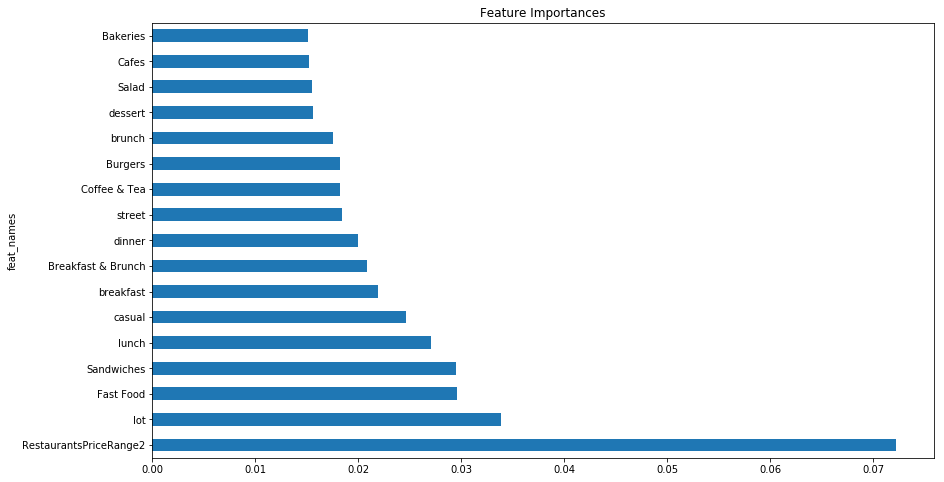

In [28]:
## Okay, so we won't use random forest here, but maybe we can look @ feature importances for some clues
feat_index = list(np.where(clf.feature_importances_ > .015)[0])
feat_vals = clf.feature_importances_[feat_index]
feat_names = X.columns.values[feat_index]
clf_df = pd.DataFrame({
    'feat_names': feat_names,
    'feat_index':feat_index,
    'feat_vals':feat_vals
})
fig = plt.figure(figsize=(14,8))
clf_df.sort_values(by="feat_vals",ascending=False,inplace=True)
feat_names_sorted = clf_df['feat_names'].values
print(f'The most important features are: {feat_names_sorted} ')
clf_df.set_index('feat_names',inplace=True)
class_graph = (clf_df['feat_vals']
 .plot.barh()
 .set_title('Feature Importances')
)
plt.show()

#### What's wrong with the RFC?

Well first off, random forests generally do not do well with high-dimensional data.  Secondly, I'm not so sure this is the best way to calculate our error.  Our dependant variable (stars) is ordinal, somewhere between continuous and categorical.  When we are using RCF, a model that predicts a given 4-star restaurant $R$ as a 1-star is no less wrong than a model that predicts $R$ to be a 3-star restaurant.

### Revisiting Random Forest error minimization with RFR

Using a **Random Forest Regressor (RFR)** may solve our error problem.  Instead of predicting what class of stars a restaurant falls into, this will predict a continuous score metric for the restaurant.  The problem now becomes interpretations of predictions.  Since the predictions are continuous and the dependant variable is ordinal, it is unlikely that any values will match their predicted value.  This could cause confusion if you were using a metric like accuracy the judge the validity of this model.

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
regr = RandomForestRegressor()
regr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
print('Score of regressor on training:  ' + str(regr.score(X_train,y_train)))
## Still pretty bad
print('Score of regressor on test:  ' + str(regr.score(X_test,y_test)))

Score of regressor on training:  0.683024150211
Score of regressor on test:  0.265210734887


It looks like the regressor has the same problem as the classifier, overfitting the training data.  Do the feature importances line up?

The most important features are:  ['Fast Food' 'lunch' 'RestaurantsPriceRange2' 'Burgers' 'casual' 'lot'
 'Sandwiches' 'street' 'Delis' 'Chicken Wings' 'breakfast'
 'Breakfast & Brunch' 'Pizza' 'Coffee & Tea' 'Salad' 'brunch' 'Desserts'
 'Cafes']


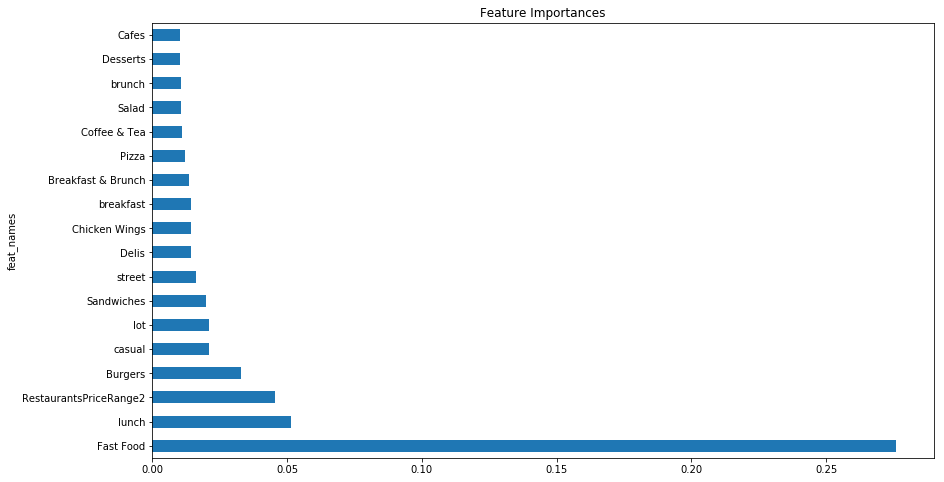

The most important features are:  ['RestaurantsPriceRange2' 'Breakfast & Brunch' 'Burgers' 'Cafes'
 'Chicken Wings' 'Coffee & Tea' 'Delis' 'Desserts' 'Fast Food' 'Pizza'
 'Salad' 'Sandwiches' 'casual' 'lot' 'street' 'breakfast' 'brunch' 'lunch']


In [32]:
# Let's look at feature importances for regressor
r_feat_index = list(np.where(regr.feature_importances_ > .01)[0])
r_feat_vals = regr.feature_importances_[r_feat_index]
r_feat_names = X.columns.values[r_feat_index]
regr_df = pd.DataFrame({
    'feat_names': r_feat_names,
    'feat_index': r_feat_index,
    'feat_vals': r_feat_vals
})
fig = plt.figure(figsize=(14,8))
regr_df.sort_values(by="feat_vals",ascending=False,inplace=True)
print('The most important features are:  ' + str(regr_df['feat_names'].values))
regr_df.set_index('feat_names',inplace=True)
class_graph = (regr_df['feat_vals']
 .plot.barh()
 .set_title('Feature Importances')
)

plt.show()
print('The most important features are:  ' + str(r_feat_names))

Looks like when I use RFR, the Fast Food attribute is emphasized compared to the RFC.

#### Correlation Table
Visual representation of correlations via correlation table.  Use the features that are most important from RF to look at their relationship to 'stars' and any
indication to colinearity.
We will also look at eigenvalues to get a better idea.

In [33]:
corr_feats = list(clf_df.index.values)
corr_feats.append('stars')
corr_df = expanded_rest_df[corr_feats]

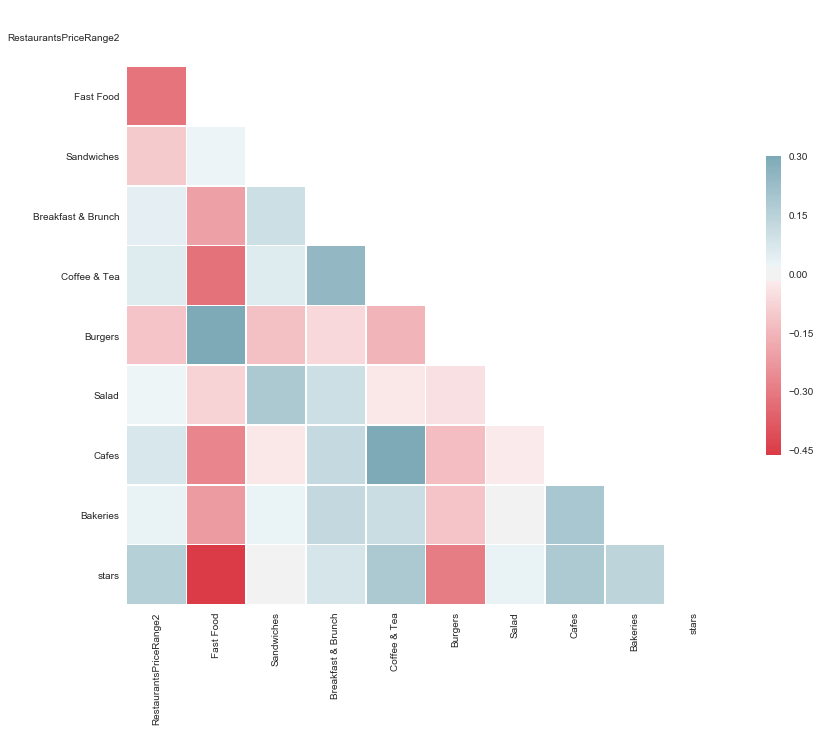

In [34]:
sns.set(style="white")
# Compute the correlation matrix
hist_corr = corr_df
corr = hist_corr.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.show()

Doesn't look like any eigenvalues are too close to zero, so we don't have to be too concerned about colinearity when making our final insights.

In [35]:
corr_mat = corr_df.as_matrix().astype(np.float64)
corr_cof = np.corrcoef(corr_mat,rowvar = 0)
w, v = np.linalg.eig(corr_cof)
print(w)
print(abs(w)<0.01)

[ 3.06427506  2.33978826  1.70518591  1.28030153  1.07542737  0.96409285
  0.95008566  0.90474975  0.83970755  0.75470888  0.67952638  0.65025281
  0.36479436  0.56443797  0.42852484  0.50410948  0.47475618  0.45527515]
[False False False False False False False False False False False False
 False False False False False False]


### Gradient Boosting

Since RF didn't work out so well,  Lets try and use GB method.  Gradient Boosting is an improvement of RF that uses weighted subsets of weak learners in order to gather a more robust set of weak learners.  Like RF, it then uses those learners to create one single estimator.

Random forest pointed us in the right direction, and we were able to figure out that there was little to no multicolinearity among the top predictors.  In order to further iterate,
I'm going to look at the gradient boosted classifier method, which is more robust with high dimensional data and more impervious to overfitting (which we experienced big time with
the random forest).  I plan on using the top features from the GBR in an ordinal least absolute deviance regression (see below).  From that
regresssion, we will hopefully be able to draw out important and actionable insights regarding attributes and their relationship to stars.

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
gbr = GradientBoostingRegressor()

gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [38]:
gbr_train_score = gbr.score(X_train,y_train)
gbr_test_score = gbr.score(X_test,y_test)
print('Minimal overfitting, yay!')
print(f'GB Train Score:  {gbr_train_score}')
print(f'GB Test SCore:  {gbr_test_score}')
gbr_index = np.where(gbr.feature_importances_ > .01)[0]
gbr_names = list(X.columns.values[gbr_index])

Minimal overfitting, yay!
GB Train Score:  0.3794501042491297
GB Test SCore:  0.3339330782411634


In [39]:
gbr_df = X[gbr_names]
gbr_X = gbr_df.as_matrix()

In [40]:
# Make matrices of top features from GBR
gbr_X_train,gbr_X_test,gbr_y_train,gbr_y_test = train_test_split(gbr_X,y ,test_size=0.3)

### LAD Regression

The mord python package uses the scikit learn API to create various statistical methods for ordinal data (perfect!).  We will use the the ordinal Least Absolute Deviance
(LAD) regression here.  This regression was primarily chosen because it uses the L1 norm as the error measurement, which puts an emphasis on feature selection, but may leave us vulnerable if anyof the predictors happened to be multicollinear.  But since we already confirmed no multicollinearity, we are able use this method more confidently.

In [41]:
from mord.regression_based import LAD

In [42]:
lad_train = LAD(verbose=1)
lad_train.fit(gbr_X_train,gbr_y_train)

[LibLinear]

LAD(C=1.0, dual=True, epsilon=0.0, fit_intercept=True, intercept_scaling=1.0,
  loss='epsilon_insensitive', max_iter=1000, random_state=None, tol=0.0001,
  verbose=1)

In [43]:
## Look at coefficient values for 'most important features' determined by Gradient Boosted Linear Regression
lad_coef_train_df = pd.DataFrame({
    'name':gbr_names,
    'value':list(lad_train.coef_)
})
lad_coef_train_df.sort_values(by=['value'],ascending=False,axis=0,inplace=False)

,name,value
11,Curry Sausage,0.996635
22,Poke,0.501001
14,Fish & Chips,0.499526
10,Convenience Stores,0.492109
16,Food Trucks,0.491319
25,Street Vendors,0.456544
27,Vegan,0.354376
20,Latin American,0.337716
18,Gluten-Free,0.195002
30,street,0.171956


In [44]:
# Getting proportions of each top and bottom 5 attributes for each star category and average across all restaurants
poke_vals = pd.crosstab(expanded_rest_df['stars'],expanded_rest_df['Poke'], normalize='columns').values[:,1]
curry_vals = pd.crosstab(expanded_rest_df['stars'],expanded_rest_df['Curry Sausage'], normalize='columns').values[:,1]
fc_vals = pd.crosstab(expanded_rest_df['stars'],expanded_rest_df['Fish & Chips'], normalize = 'columns').values[:,1]
food_truck_vals = pd.crosstab(expanded_rest_df['stars'],expanded_rest_df['Food Trucks'], normalize = 'columns').values[:,1]
avg_vals = pd.crosstab(expanded_rest_df['stars'],expanded_rest_df['is_open'], normalize='columns').values[:,0]
ff_vals = pd.crosstab(expanded_rest_df['stars'],expanded_rest_df['Fast Food'],normalize='columns').values[:,1]
bagel_vals = pd.crosstab(expanded_rest_df['stars'],expanded_rest_df['Bagels'],normalize='columns').values[:,1]
burger_vals = pd.crosstab(expanded_rest_df['stars'],expanded_rest_df['Burgers'],normalize='columns').values[:,1]
chickenw_vals = pd.crosstab(expanded_rest_df['stars'],expanded_rest_df['Chicken Wings'],normalize='columns').values[:,1]

In [78]:
# Putting attriubtes and sample sizes into dictionary
cat_ss = {}
names = ['Poke','Curry Sausage','Fish & Chips','Food Trucks','Fast Food','Bagels','Chicken Wings', 'Burgers']
for n in names:
    cat_ss[n] = sum(expanded_rest_df[n])

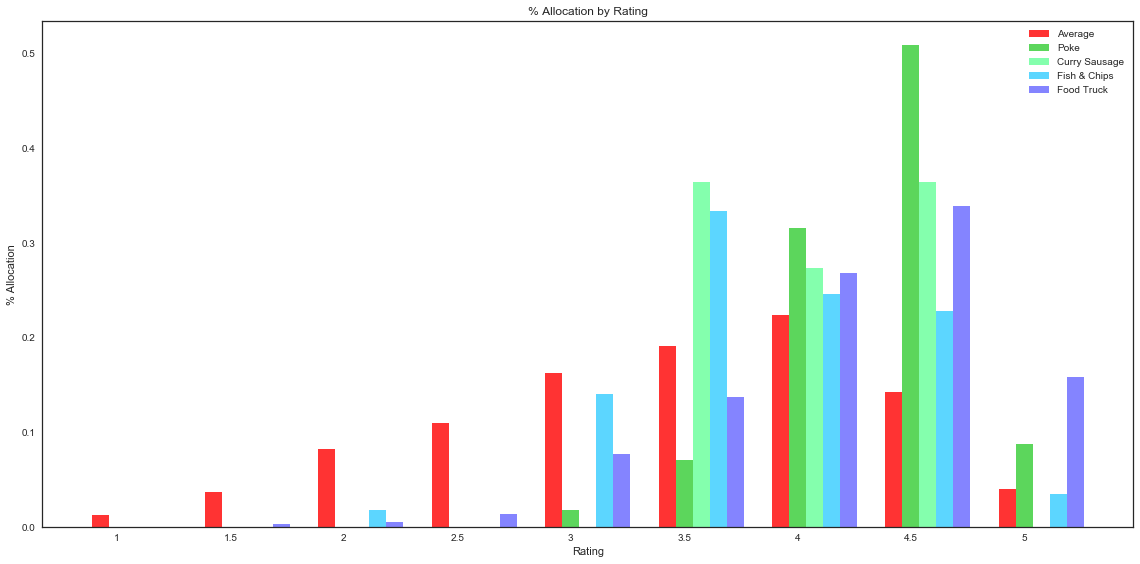

Sample sizes: {'Poke': 57, 'Curry Sausage': 11, 'Fish & Chips': 57, 'Food Trucks': 366, 'Fast Food': 5245, 'Bagels': 316, 'Chicken Wings': 610, 'Burgers': 1957} 


In [95]:
# Plotting the % rating for the top four attributes vs. the average

n_groups = 9
#ax = plt.subplots()
fig = plt.figure(figsize = (16,8))
index = np.arange(n_groups)

bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, avg_vals,bar_width,
                alpha = opacity,
                color = 'red',
                label = 'Average')
rects2 = plt.bar(index + bar_width, poke_vals,bar_width,
                alpha = opacity,
                color = '#33cc33',
                label = 'Poke')
rects3 = plt.bar(index + (2* bar_width), curry_vals,bar_width,
                alpha = opacity,
                color = '#66ff99',
                label = 'Curry Sausage')
rects4 = plt.bar(index + (3*bar_width), fc_vals,bar_width,
                alpha = opacity,
                color = '#33ccff',
                label = 'Fish & Chips')
rects5 = plt.bar(index + (4*bar_width), food_truck_vals,bar_width,
                alpha = opacity,
                color = '#6666ff',
                label = 'Food Truck')

plt.xlabel('Rating')
plt.ylabel('% Allocation')
plt.title('% Allocation by Rating')
plt.xticks(index + bar_width, ('1', '1.5', '2', '2.5','3','3.5','4','4.5','5'))
plt.legend()
 
plt.tight_layout()
plt.show()
print(f'Sample sizes: {cat_ss} ')

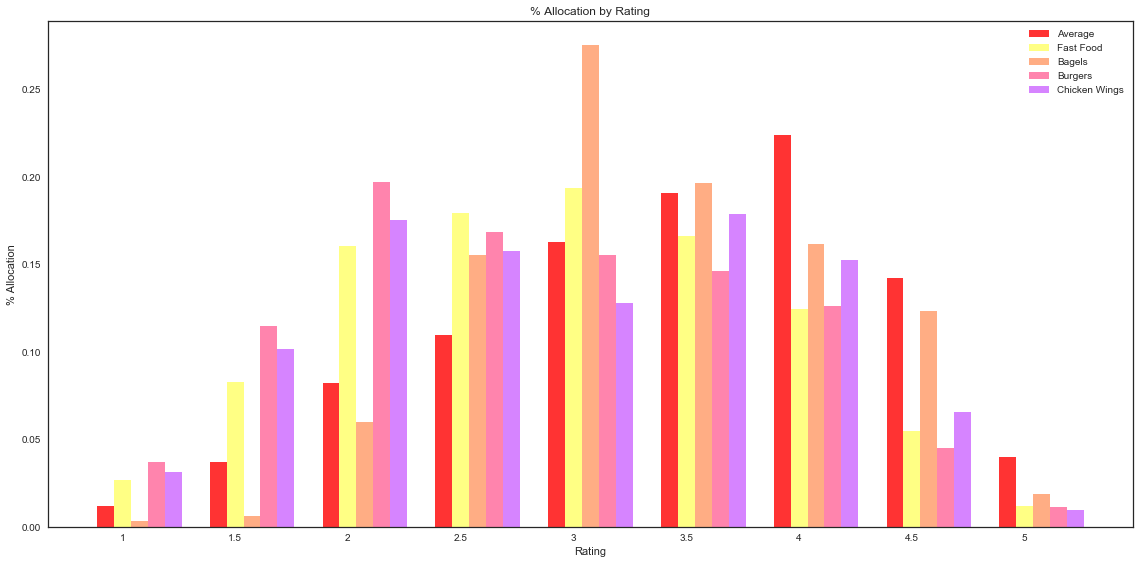

Sample sizes: {'Poke': 57, 'Curry Sausage': 11, 'Fish & Chips': 57, 'Food Trucks': 366, 'Fast Food': 5245, 'Bagels': 316, 'Chicken Wings': 610, 'Burgers': 1957} 


In [93]:
# Plotting the % rating for the bottom four attributes vs. the average

n_groups = 9
#ax = plt.subplots()
fig = plt.figure(figsize = (16,8))
index = np.arange(n_groups)

bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, avg_vals,bar_width,
                alpha = opacity,
                color = 'red',
                label = 'Average')
rects2 = plt.bar(index + bar_width, ff_vals,bar_width,
                alpha = opacity,
                color = '#ffff66',
                label = 'Fast Food')
rects3 = plt.bar(index + (2* bar_width), bagel_vals,bar_width,
                alpha = opacity,
                color = '#ff9966',
                label = 'Bagels')
rects4 = plt.bar(index + (3*bar_width), burger_vals,bar_width,
                alpha = opacity,
                color = '#ff6699',
                label = 'Burgers')
rects5 = plt.bar(index + (4*bar_width), chickenw_vals,bar_width,
                alpha = opacity,
                color = '#cc66ff',
                label = 'Chicken Wings')

plt.xlabel('Rating')
plt.ylabel('% Allocation')
plt.title('% Allocation by Rating')
plt.xticks(index + bar_width, ('1', '1.5', '2', '2.5','3','3.5','4','4.5','5'))
plt.legend()
 
plt.tight_layout()
plt.show()
print(f'Sample sizes: {cat_ss} ')

## Interpreting Results
Our analysis returned some interesting findings.  For example, it looks like 'Poke' restaurants have a strong relationship to higher stars.  It also looks like Food Trucks
have been able to experience considerably favorable ratings from users.  As the correlation plot showed, Fast Food restaurants are more likely to receive lower ratings, and it also
looks like Tex-Mex places suffer a similar fate.  Once standard error of these coefficients are calculated, we will be able make claims about our data with greater certainty.

## Next Steps
Figure out a way to calculate feature standard errors to determine feature validity (does not come standard with scikit learn libraries).  In addition, look at interaction terms between top/all features when predicting stars

Additional Projects w/this dataset:  Use the corpus of user reviews to determine relationship between sentiment/rating.  Could also build recommendation engine from this.
Use text to predict age/gender.  What words/phrases are best at predicting gender/age? (Could use glmnet here)
